In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
site = 'http://stats.espnscrum.com/scrum/rugby/records/team/match_results.html?'
teams = [1, 2, 3, 4, 9, 20]
df = pd.DataFrame()
for team in teams:
    for year in range(2000,2020):
        page = site + 'id=' + str(year) + ';team=' + str(team) + ';type=year'
        df = df.append(pd.read_html(page)[0],ignore_index=True)

In [3]:
df['Datetime'] = pd.to_datetime(df['Date'])
df.sort_values('Datetime',inplace=True)

In [6]:
df['HT'].loc[1092]

'9'

In [19]:
df.loc[df['HT']=='-','HT'] = 0
df.loc[df['HT.1']=='-','HT.1'] = 0

In [20]:
df.iloc[985]

Team                                        Australia
Pts                                                 6
Pts.1                                               0
Team.1                                         France
HT                                                  0
HT.1                                                0
Unnamed: 6                                        NaN
Series        France tour / Trophee des Bicentenaires
Ground                                      Melbourne
Date                                      14 Jun 2014
Match                                         Details
Datetime                          2014-06-14 00:00:00
Name: 1097, dtype: object

In [21]:
df['HT'] = pd.to_numeric(df['HT'])
df['HT.1'] = pd.to_numeric(df['HT.1'])
df['Unnamed: 6']= pd.to_numeric(df['Unnamed: 6'])

In [22]:
df['HT'].loc[1092]

9

In [23]:
df.drop_duplicates(inplace=True,keep='first')
df = df[df['Series'].str.contains('Six Nations')]

In [24]:
#df.drop(df[df['Team']=='Italy'].index,axis=0,inplace=True)
#df.drop(df[df['Team.1']=='Italy'].index,axis=0,inplace=True)

In [25]:
df

,Team,Pts,Pts.1,Team.1,HT,HT.1,Unnamed: 6,Series,Ground,Date,Match,Datetime
0,England,50,18,Ireland,25,3,NaN,Six Nations / Millennium Trophy,Twickenham,5 Feb 2000,Details,2000-02-05
683,Wales,3,36,France,3,9,NaN,Six Nations,Millennium Stadium,5 Feb 2000,Details,2000-02-05
1159,Italy,34,20,Scotland,12,10,NaN,Six Nations,Rome,5 Feb 2000,Details,2000-02-05
236,Ireland,44,22,Scotland,13,10,NaN,Six Nations / Centenary Quaich,Lansdowne Road,19 Feb 2000,Details,2000-02-19
928,France,9,15,England,0,9,NaN,Six Nations,Stade de France,19 Feb 2000,Details,2000-02-19
1160,Wales,47,16,Italy,30,9,NaN,Six Nations,Millennium Stadium,19 Feb 2000,Details,2000-02-19
456,Ireland,60,13,Italy,33,0,NaN,Six Nations,Lansdowne Road,4 Mar 2000,Details,2000-03-04
237,Scotland,16,28,France,6,10,NaN,Six Nations,Murrayfield,4 Mar 2000,Details,2000-03-04
2,England,46,12,Wales,19,12,NaN,Six Nations,Twickenham,4 Mar 2000,Details,2000-03-04
238,Wales,26,18,Scotland,13,3,NaN,Six Nations,Millennium Stadium,18 Mar 2000,Details,2000-03-18


In [26]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Score Margin')

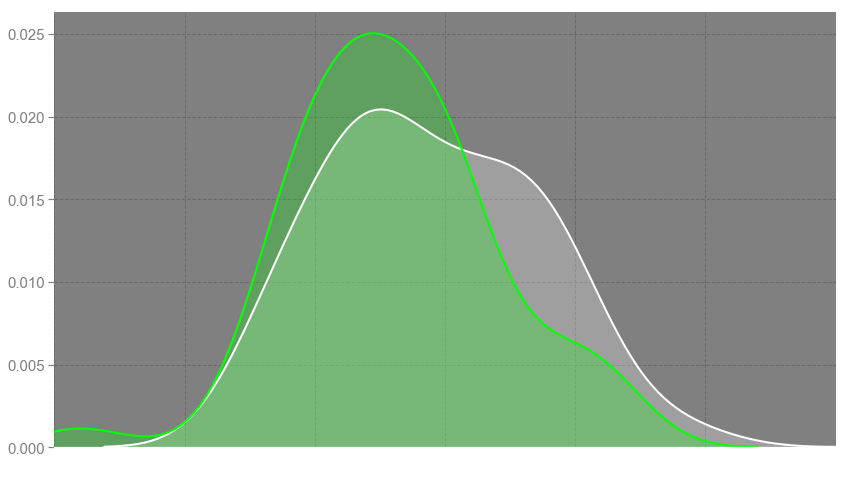

In [27]:
home_nation = 'England'
away_nation = 'Ireland'
fig = plt.Figure(figsize=(6,8))
df_homenation = df[df['Team'] == home_nation]
df_awaynation = df[df['Team'] == away_nation]

plt.figure(figsize=(14,8))
sns.set_style("dark")
sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'grey','xtick.color':'white', 'ytick.color':'grey',
            'grid.color':'dimgrey','ytick.left': True,'xtick.bottom': True,'axes.spines.right': False,
            'axes.spines.top': False,'axes.spines.right': False,'axes.spines.left': False,
           'grid.linestyle': '--','text.color': 'white',})
ax = sns.kdeplot(data = df_homenation['Pts']-df_homenation['Pts.1'], shade=True,color='white',linewidth=2)
ax  = sns.kdeplot(data = df_awaynation['Pts']-df_awaynation['Pts.1'], shade=True,color='lime',linewidth=2)
ax.set(xlim=(-40, 80))
ax.tick_params(labelsize=15)
ax.set_xlabel('Score Margin', fontsize=20 , color='white')

#ax = sns.distplot(df_homenation['Pts']-df_homenation['Pts.1'], kde=False, fit=stats.gamma, hist=None);
#ax = sns.distplot(df_awaynation['Pts']-df_awaynation['Pts.1'], kde=False, fit=stats.gamma, hist=None);

#l1 = ax.lines[0]
#l2 = ax.lines[1]

#x1 = l1.get_xydata()[:,0]
#y1 = l1.get_xydata()[:,1]
#x2 = l2.get_xydata()[:,0]
#y2 = l2.get_xydata()[:,1]
#ax.fill_between(x1,y1, alpha=0.3)
#ax.fill_between(x2,y2, alpha=0.3)

In [28]:
df_nations = pd.DataFrame({'Nations': ['England','Ireland','Wales','Scotland','France','Italy'],
                         'Colors': ['white','lime','red','navy','blue','dodgerblue']})
df_nations['HomeMedian'] = ""
df_nations['AwayMedian'] = ""

In [48]:
from scipy.stats import gaussian_kde
import scipy
x_grid = np.linspace(-80, 80, 1000)
medvals = []
for i in range(0,len(df_nations)):
    nation =df_nations['Nations'].iloc[i]
    df_homenation = df[df['Team'] == nation]
    df_awaynation = df[df['Team.1'] == nation]
    data_home = df_homenation['Pts']-df_homenation['Pts.1']
    data_away = df_awaynation['Pts.1']-df_awaynation['Pts']
    
    kde_home = gaussian_kde(dataset=data_home,bw_method='silverman')
    p_home = kde_home.evaluate(x_grid)
    cumval_home = kde_home.integrate_box_1d(0,80)
    df_nations['HomeMedian'].iloc[i] =cumval_home
    #df_nations['HomeMedian'].iloc[i] = x_grid[p_home.argmax()]
    
    kde_away = gaussian_kde(dataset=data_away,bw_method='silverman')
    p_away = kde_away.evaluate(x_grid)
    cumval_away = kde_away.integrate_box_1d(0,80)
    #df_nations['AwayMedian'].iloc[i] = x_grid[p_away.argmax()]
    df_nations['AwayMedian'].iloc[i] = cumval_away

In [49]:
df_home = df_nations.sort_values(by='HomeMedian',ascending=False)
df_away = df_nations.sort_values(by='AwayMedian',ascending=False)

In [50]:
df_away

,Nations,Colors,HomeMedian,AwayMedian
0,England,white,0.832164,0.578297
1,Ireland,lime,0.767336,0.519566
4,France,blue,0.721689,0.505217
2,Wales,red,0.664844,0.473663
3,Scotland,navy,0.452418,0.170354
5,Italy,dodgerblue,0.221575,0.0814701


In [68]:
df_homeawaystats = pd.DataFrame({'Nations': ['England','Ireland','Wales','Scotland','France','Italy'],
                         'Colors': ['white','lime','red','navy','blue','dodgerblue']})
df_homeawaystats['HomeWins'] = ""
df_homeawaystats['AwayWins'] = ""
df_homeawaystats['HomeLosses'] = ""
df_homeawaystats['AwayLosses'] = ""
df_homeawaystats['HomeDraws'] = ""
df_homeawaystats['AwayDraws'] = ""
df_homeawaystats['Total'] = ""

In [71]:
for i in range(0,len(df_homeawaystats)):
    nation = df_homeawaystats['Nations'].iloc[i]
    df_homenation = df[df['Team'] == nation]
    homewins = len(df_homenation[df_homenation['Pts'] > df_homenation['Pts.1']])
    homelosses = len(df_homenation[df_homenation['Pts'] < df_homenation['Pts.1']])
    homedraws = len(df_homenation[df_homenation['Pts'] == df_homenation['Pts.1']])
 
    df_awaynation = df[df['Team.1'] == nation]
    awaywins = len(df_awaynation[df_awaynation['Pts.1'] > df_awaynation['Pts']])
    awaylosses = len(df_awaynation[df_awaynation['Pts.1'] < df_awaynation['Pts']])
    awaydraws = len(df_awaynation[df_awaynation['Pts.1'] == df_awaynation['Pts']])
    
    df_homeawaystats['HomeWins'].iloc[i] = homewins
    df_homeawaystats['AwayWins'].iloc[i] = awaywins
    df_homeawaystats['HomeLosses'].iloc[i] = homelosses
    df_homeawaystats['AwayLosses'].iloc[i] = awaylosses
    df_homeawaystats['HomeDraws'].iloc[i] = homedraws
    df_homeawaystats['AwayDraws'].iloc[i] = awaydraws
    df_homeawaystats['Total'].iloc[i] = homewins+awaywins+homelosses+awaylosses+homedraws+awaydraws

In [114]:
df_homeawaystats['HomePerc'] = df_homeawaystats['HomeWins']/(df_homeawaystats['HomeWins']+df_homeawaystats['HomeLosses']+df_homeawaystats['HomeDraws'])
df_homeawaystats['AwayPerc'] = df_homeawaystats['AwayWins']/(df_homeawaystats['AwayWins']+df_homeawaystats['AwayLosses']+df_homeawaystats['AwayDraws'])
df_homeawaystats

,Nations,Colors,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeDraws,AwayDraws,Total,HomePerc,AwayPerc
0,England,white,42,27,7,22,1,1,100,0.84,0.54
1,Ireland,lime,38,28,10,21,2,1,100,0.76,0.56
2,Wales,red,33,24,16,24,1,2,100,0.66,0.48
3,Scotland,navy,21,7,27,42,2,1,100,0.42,0.14
4,France,blue,37,24,12,25,1,1,100,0.74,0.48
5,Italy,dodgerblue,10,2,40,47,0,1,100,0.20,0.04


In [115]:
df_nations['HomeMedian'] = df_homeawaystats['HomePerc']
df_nations['AwayMedian'] = df_homeawaystats['AwayPerc']

df_home = df_nations.sort_values(by='HomeMedian',ascending=False)
df_away = df_nations.sort_values(by='AwayMedian',ascending=False)

In [99]:
float(homewins)

10.0

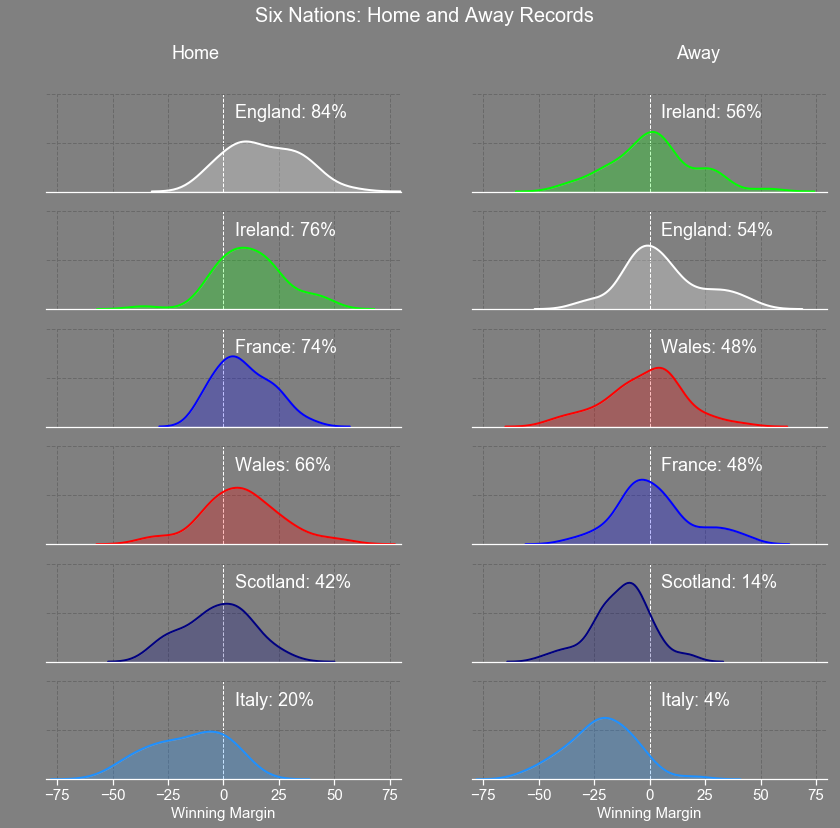

In [117]:
num = len(df_nations)
fig = plt.figure(figsize=(14,24))
#fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 24), constrained_layout=True)
for i in range(0,num):
    ax = fig.add_subplot(num*2,2,2*i+1)
    #ax = axes[i,0]
    home_nation = df_home['Nations'].iloc[i]
    df_homenation = df[df['Team'] == home_nation]
    homewins = float(df_homeawaystats[df_homeawaystats['Nations']==home_nation]['HomeWins'])
    hometotal = homewins + float(df_homeawaystats[df_homeawaystats['Nations']==home_nation]['HomeLosses']) + float(df_homeawaystats[df_homeawaystats['Nations']==home_nation]['HomeDraws'])
    homeperc = homewins/hometotal
        
    sns.set_style("dark")
    sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'grey','xtick.color':'grey', 'ytick.color':'grey',
                'grid.color':'dimgrey','ytick.left': True,'xtick.bottom': True,'axes.spines.right': False,
                'axes.spines.top': False,'axes.spines.right': False,'axes.spines.left': False,
               'grid.linestyle': '--','text.color': 'white',})
    ax = sns.kdeplot(data = df_homenation['Pts']-df_homenation['Pts.1'], shade=True,color=df_home['Colors'].iloc[i],linewidth=2,ax=ax)
    ax.set(xlim=(-80, 80))
    ax.tick_params(labelsize=15)
    ax.set_xlabel('Winning Margin', fontsize=15 , color='white')
    #plt.title(home_nation,fontsize=18)
    if i == len(df_nations)-1:
        ax.tick_params(axis='x', colors='white')
    a = ax.get_xgridlines()
    b = a[4]
    b.set_color('white')
    ymin, ymax = ax.get_ylim()
    ax.set(ylim=(0, 0.04))
    s = "{0}: {1:.0%}".format(home_nation,homeperc)
    ax.text(x=5, y=0.03, s=s, fontsize=18)
    
    #ax = axes[i,1]
    ax = fig.add_subplot(num*2,2,2*i+2)
    away_nation = df_away['Nations'].iloc[i]
    df_awaynation = df[df['Team.1'] == away_nation]
    awaywins = float(df_homeawaystats[df_homeawaystats['Nations']==away_nation]['AwayWins'])
    awaytotal = awaywins + float(df_homeawaystats[df_homeawaystats['Nations']==away_nation]['AwayLosses']) + float(df_homeawaystats[df_homeawaystats['Nations']==away_nation]['AwayDraws'])
    awayperc = awaywins/awaytotal
    ax = sns.kdeplot(data = df_awaynation['Pts.1']-df_awaynation['Pts'], shade=True,color=df_away['Colors'].iloc[i],linewidth=2,ax=ax)
    ax.set(xlim=(-80, 80))
    ax.tick_params(labelsize=15)
    ax.set_xlabel('Winning Margin', fontsize=15 , color='white')
    #plt.title(home_nation,fontsize=18)
    if i == len(df_nations)-1:
        ax.tick_params(axis='x', colors='white')
    a = ax.get_xgridlines()
    b = a[4]
    b.set_color('white')
    ymin, ymax = ax.get_ylim()
    ax.set(ylim=(0, 0.04))
    s = "{0}: {1:.0%}".format(away_nation,awayperc)
    ax.text(x=5, y=0.03, s=s, fontsize=18)
    
fig.suptitle("Six Nations: Home and Away Records", fontsize='20')
#fig.tight_layout()
fig.subplots_adjust(top=0.93) 
fig.text(x=0.25,y=0.95,s='Home',fontsize=18)
fig.text(x=0.75,y=0.95,s='Away',fontsize=18)

plt.savefig('sixnations_home_away_records.png',bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

In [61]:
ymax

0.02633088178594594

In [54]:
df

,Team,Pts,Pts.1,Team.1,HT,HT.1,Unnamed: 6,Series,Ground,Date,Match,Datetime
0,England,50,18,Ireland,25,3,NaN,Six Nations / Millennium Trophy,Twickenham,5 Feb 2000,Details,2000-02-05
683,Wales,3,36,France,3,9,NaN,Six Nations,Millennium Stadium,5 Feb 2000,Details,2000-02-05
1159,Italy,34,20,Scotland,12,10,NaN,Six Nations,Rome,5 Feb 2000,Details,2000-02-05
236,Ireland,44,22,Scotland,13,10,NaN,Six Nations / Centenary Quaich,Lansdowne Road,19 Feb 2000,Details,2000-02-19
928,France,9,15,England,0,9,NaN,Six Nations,Stade de France,19 Feb 2000,Details,2000-02-19
1160,Wales,47,16,Italy,30,9,NaN,Six Nations,Millennium Stadium,19 Feb 2000,Details,2000-02-19
456,Ireland,60,13,Italy,33,0,NaN,Six Nations,Lansdowne Road,4 Mar 2000,Details,2000-03-04
237,Scotland,16,28,France,6,10,NaN,Six Nations,Murrayfield,4 Mar 2000,Details,2000-03-04
2,England,46,12,Wales,19,12,NaN,Six Nations,Twickenham,4 Mar 2000,Details,2000-03-04
238,Wales,26,18,Scotland,13,3,NaN,Six Nations,Millennium Stadium,18 Mar 2000,Details,2000-03-18


In [56]:
for i in range(0,len(df_homeawaystats)):
    nation = df_homeawaystats['Nations'].iloc[i]
    df_homenation = df[df['Team'] == nation]
    homewins = len(df_homenation[df_homenation['Pts'] > df_homenation['Pts.1']])
    homelosses = len(df_homenation[df_homenation['Pts'] < df_homenation['Pts.1']])
    homedraws = len(df_homenation[df_homenation['Pts'] == df_homenation['Pts.1']])
 
    df_awaynation = df[df['Team.1'] == nation]
    awaywins = len(df_awaynation[df_awaynation['Pts.1'] > df_awaynation['Pts']])
    awaylosses = len(df_awaynation[df_awaynation['Pts.1'] < df_awaynation['Pts']])
    awaydraws = len(df_awaynation[df_awaynation['Pts.1'] == df_awaynation['Pts']])
    
    df_homeawaystats['HomeWins'].iloc[i] = homewins
    df_homeawaystats['AwayWins'].iloc[i] = awaywins
    df_homeawaystats['HomeLosses'].iloc[i] = homelosses
    df_homeawaystats['AwayLosses'].iloc[i] = awaylosses
    df_homeawaystats['HomeDraws'].iloc[i] = homedraws
    df_homeawaystats['AwayDraws'].iloc[i] = awaydraws
    df_homeawaystats['Total'].iloc[i] = homewins+awaywins+homelosses+awaylosses+homedraws+awaydraws

In [58]:
df_homeawaystats

,Nations,Colors,HomeWins,AwayWins,HomeLosses,AwayLosses,HomeDraws,AwayDraws,Total
0,England,white,42,27,7,22,1,1,100
1,Ireland,lime,38,28,10,21,2,1,100
2,Wales,red,33,24,16,24,1,2,100
3,Scotland,navy,21,7,27,42,2,1,100
4,France,blue,37,24,12,25,1,1,100
5,Italy,dodgerblue,10,2,40,47,0,1,100


In [59]:
df_away

,Nations,Colors,HomeMedian,AwayMedian
0,England,white,0.832164,0.578297
1,Ireland,lime,0.767336,0.519566
4,France,blue,0.721689,0.505217
2,Wales,red,0.664844,0.473663
3,Scotland,navy,0.452418,0.170354
5,Italy,dodgerblue,0.221575,0.0814701


In [40]:
nation = df_homeawaystats['Nations'].iloc[4]
df_homenation = df[df['Team'] == nation]
df_homenation['Datetime'] = pd.to_datetime(df_homenation['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df_homenation.sort_values('Datetime')

,Team,Pts,Pts.1,Team.1,HT,HT.1,Unnamed: 6,Series,Ground,Date,Match,Datetime
928,France,9,15,England,0,9,NaN,Six Nations,Stade de France,19 Feb 2000,Details,2000-02-19
930,France,25,27,Ireland,13,7,NaN,Six Nations,Stade de France,19 Mar 2000,Details,2000-03-19
931,France,42,31,Italy,20,17,NaN,Six Nations,Stade de France,1 Apr 2000,Details,2000-04-01
936,France,16,6,Scotland,6,6,NaN,Six Nations,Stade de France,4 Feb 2001,Details,2001-02-04
693,France,35,43,Wales,19,16,NaN,Six Nations,Stade de France,17 Mar 2001,Details,2001-03-17
1181,France,33,12,Italy,19,12,NaN,Six Nations,Stade de France,2 Feb 2002,Details,2002-02-02
23,France,20,15,England,17,7,NaN,Six Nations,Stade de France,2 Mar 2002,Details,2002-03-02
476,France,44,5,Ireland,28,5,NaN,Six Nations,Stade de France,6 Apr 2002,Details,2002-04-06
264,France,38,3,Scotland,17,3,NaN,Six Nations,Stade de France,23 Feb 2003,Details,2003-02-23
717,France,33,5,Wales,10,5,NaN,Six Nations,Stade de France,29 Mar 2003,Details,2003-03-29


In [42]:
df_homenation.drop_duplicates()

,Team,Pts,Pts.1,Team.1,HT,HT.1,Unnamed: 6,Series,Ground,Date,Match,Datetime
928,France,9,15,England,0,9,NaN,Six Nations,Stade de France,19 Feb 2000,Details,2000-02-19
930,France,25,27,Ireland,13,7,NaN,Six Nations,Stade de France,19 Mar 2000,Details,2000-03-19
931,France,42,31,Italy,20,17,NaN,Six Nations,Stade de France,1 Apr 2000,Details,2000-04-01
936,France,16,6,Scotland,6,6,NaN,Six Nations,Stade de France,4 Feb 2001,Details,2001-02-04
693,France,35,43,Wales,19,16,NaN,Six Nations,Stade de France,17 Mar 2001,Details,2001-03-17
1181,France,33,12,Italy,19,12,NaN,Six Nations,Stade de France,2 Feb 2002,Details,2002-02-02
23,France,20,15,England,17,7,NaN,Six Nations,Stade de France,2 Mar 2002,Details,2002-03-02
476,France,44,5,Ireland,28,5,NaN,Six Nations,Stade de France,6 Apr 2002,Details,2002-04-06
264,France,38,3,Scotland,17,3,NaN,Six Nations,Stade de France,23 Feb 2003,Details,2003-02-23
717,France,33,5,Wales,10,5,NaN,Six Nations,Stade de France,29 Mar 2003,Details,2003-03-29


In [43]:
df_homenation['HT'].loc[1092]

9

In [ ]:
str1 = 'Team'
test1[str1].equals(test2[str1])

In [ ]:
test1.dtype()

In [ ]:
test2

In [ ]:
set(test1).symmetric_difference(test2)